## Working with Time Series

#### • Time stamps reference particular moments in time (e.g., July 4th, 2015, at 7:00 a.m.).
#### • Time intervals and periods reference a length of time between a particular beginning and end point—for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods constituting days).

In [1]:
from datetime import datetime


In [3]:
datetime(year=2015,month=7,day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [6]:
import pandas as pd



In [7]:
help(pd.datetime)

Help on class datetime in module datetime:

class datetime(date)
 |  datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
 |  
 |  The year, month and day arguments are required. tzinfo may be None, or an
 |  instance of a tzinfo subclass. The remaining arguments may be ints.
 |  
 |  Method resolution order:
 |      datetime
 |      date
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __new__(*args, **kwa

In [8]:
import numpy as np
date=np.array('2019-07-05',dtype=np.datetime64)

In [9]:
date

array('2019-07-05', dtype='datetime64[D]')

In [10]:
date+np.arange(12)

array(['2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08',
       '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12',
       '2019-07-13', '2019-07-14', '2019-07-15', '2019-07-16'],
      dtype='datetime64[D]')

In [11]:
date=np.array('2019-07-05 12:00',dtype=np.datetime64)

In [12]:
date

array('2019-07-05T12:00', dtype='datetime64[m]')

In [13]:
np.datetime64('2019-06-15 12:59:50','ns')

numpy.datetime64('2019-06-15T12:59:50.000000000')

In [22]:
import pandas as pd
date = pd.to_datetime("4th July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [23]:
date.strftime('%A')

'Saturday'

#### Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [27]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
'2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [28]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [29]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Time-Series

 #### • For time stamps, Pandas provides the Timestamp type. As mentioned before, it is essentially a replacement for Python’s native datetime, but is based on the more efficient numpy.datetime64 data type. The associated index structure is DatetimeIndex.
#### • For time periods, Pandas provides the Period type. This encodes a fixed frequency interval based on numpy.datetime64. The associated index structure is PeriodIndex.
#### • For time deltas or durations, Pandas provides the Timedelta type. Timedelta is a more efficient replacement for Python’s native datetime.timedelta type, and is based on numpy.timedelta64. The associated index structure is TimedeltaIndex

In [35]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of dec, 2015',
'2015-Jul-6', '07-07-2015', '20150708'])

In [36]:
dates

DatetimeIndex(['2015-07-03', '2015-12-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [37]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-12-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [38]:
dates-dates[0]

TimedeltaIndex(['0 days', '154 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [41]:
pd.date_range('2015-07-03','2015-08-01')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-11', '2015-07-12', '2015-07-13', '2015-07-14',
               '2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18',
               '2015-07-19', '2015-07-20', '2015-07-21', '2015-07-22',
               '2015-07-23', '2015-07-24', '2015-07-25', '2015-07-26',
               '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30',
               '2015-07-31', '2015-08-01'],
              dtype='datetime64[ns]', freq='D')

In [42]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [50]:
## Year
pd.date_range('2015-07-03',periods=8,freq='y')

DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [51]:
## Month
pd.date_range('2015-07-03',periods=8,freq='m')

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

In [52]:
## Days
pd.date_range('2015-07-03',periods=8,freq='d')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [53]:
## Hours
pd.date_range('2015-07-03',periods=8,freq='h')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

#### On top of this, codes can be combined with numbers to specify other frequencies. For example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T) codes as follows:

In [54]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

## Resampling, Shifting, and Windowing

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'F:\IE Courses\Data Science\Python\Stock.csv')

C:\Users\Kanishk\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [196]:
df.head()

,date,open,high,low,close,volume,Name
0,2/8/2013,15.07,15.12,14.63,14.75,8407500.0,AAL
1,2/11/2013,14.89,15.01,14.26,14.46,8882000.0,AAL
2,2/12/2013,14.45,14.51,14.10,14.27,8126000.0,AAL
3,2/13/2013,14.30,14.94,14.25,14.66,10259500.0,AAL
4,2/14/2013,14.94,14.96,13.16,13.99,31879900.0,AAL


In [197]:
df.dropna(inplace=True)

In [198]:
import re
def regex(txt):
    txt=re.sub('/','-',txt)
    return txt

In [172]:
df['date'].apply(lambda x:regex(x))

0       2-8-2013
1      2-11-2013
2      2-12-2013
3      2-13-2013
4      2-14-2013
         ...    
493    1-26-2015
494    1-27-2015
495    1-28-2015
496    1-29-2015
497    1-30-2015
Name: date, Length: 498, dtype: object

In [203]:
df['date']=pd.to_datetime(df['date'])

In [199]:
df.drop(columns='Name',inplace=True)

In [167]:
%matplotlib inline
import seaborn
seaborn.set()

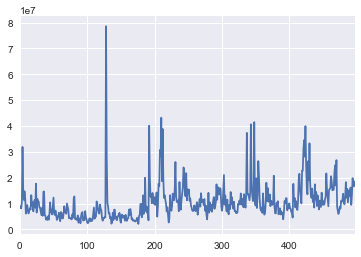

In [200]:
df['volume'].plot()

### One common need for time series data is resampling at a higher or lower frequency. You can do this using the resample() method

B         business day frequency

C         custom business day frequency (experimental)

D         calendar day frequency

W         weekly frequency

M         month end frequency

SM        semi-month end frequency (15th and end of month)

BM        business month end frequency

CBM       custom business month end frequency

MS        month start frequency

SMS       semi-month start frequency (1st and 15th)

BMS       business month start frequency

CBMS      custom business month start frequency

Q         quarter end frequency

BQ        business quarter endfrequency

QS        quarter start frequency

BQS       business quarter start frequency

A         year end frequency

BA, BY    business year end frequency

AS, YS    year start frequency

BAS, BYS  business year start frequency

BH        business hour frequency

H         hourly frequency

T, min    minutely frequency

S         secondly frequency

L, ms     milliseconds

U, us     microseconds

N         nanoseconds

In [206]:
#df['volume'].plot(alpha=0.5,style='-')
#df.resample('3T').mean()

In [207]:
Date=df['date']

In [219]:
df.index=pd.DatetimeIndex(Date)

In [222]:
df.drop(columns='date',inplace=True)

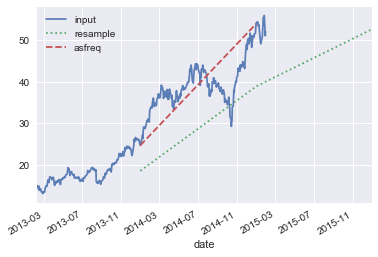

In [237]:
df['open'].plot(alpha=0.9,style='-')
df['open'].resample('BA').mean().plot(style=':')
df['open'].asfreq('BA').plot(style='--')
plt.legend(['input','resample','asfreq'],loc='upper left')

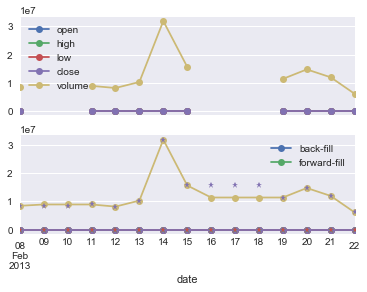

In [243]:
fig, ax = plt.subplots(2, sharex=True)
data = df.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='*')


ax[1].legend(["back-fill", "forward-fill"]);

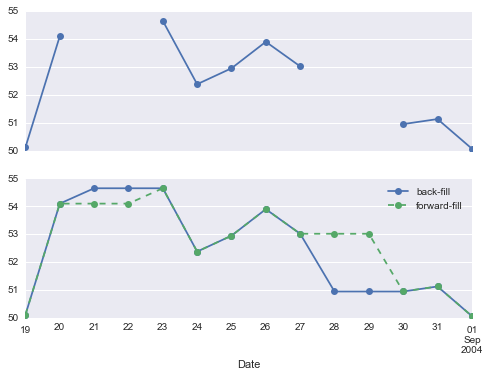

#### Time-shifts

Another common time series–specific operation is shifting of data in time. Pandas
has two closely related methods for computing this: shift() and tshift(). In short,
the difference between them is that shift() shifts the data, while tshift() shifts the
index. In both cases, the shift is specified in multiples of the frequency.

In [248]:
help(df.shift)

Help on method shift in module pandas.core.frame:

shift(periods=1, freq=None, axis=0, fill_value=None) method of pandas.core.frame.DataFrame instance
    Shift index by desired number of periods with an optional time `freq`.
    
    When `freq` is not passed, shift the index without realigning the data.
    If `freq` is passed (in this case, the index must be date or datetime,
    or it will raise a `NotImplementedError`), the index will be
    increased using the periods and the `freq`.
    
    Parameters
    ----------
    periods : int
        Number of periods to shift. Can be positive or negative.
    freq : DateOffset, tseries.offsets, timedelta, or str, optional
        Offset to use from the tseries module or time rule (e.g. 'EOM').
        If `freq` is specified then the index values are shifted but the
        data is not realigned. That is, use `freq` if you would like to
        extend the index when shifting and preserve the original data.
    axis : {0 or 'index', 1 or

In [ ]:
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])
# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

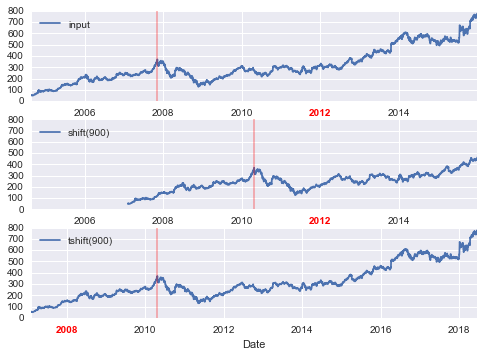

### Rolling windows
Rolling statistics are a third type of time series–specific operation implemented by
Pandas. These can be accomplished via the rolling() attribute of Series and Data
Frame objects, which returns a view similar to what we saw with the groupby operation
(see “Aggregation and Grouping” on page 158). This rolling view makes available
a number of aggregation operations by default.

In [249]:
help(df.rolling)

Help on method rolling in module pandas.core.generic:

rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None) method of pandas.core.frame.DataFrame instance
    Provide rolling window calculations.
    
    .. versionadded:: 0.18.0
    
    Parameters
    ----------
    window : int, or offset
        Size of the moving window. This is the number of observations used for
        calculating the statistic. Each window will be a fixed size.
    
        If its an offset then this will be the time period of each window. Each
        window will be a variable sized based on the observations included in
        the time-period. This is only valid for datetimelike indexes. This is
        new in 0.19.0
    min_periods : int, default None
        Minimum number of observations in window required to have a value
        (otherwise result is NA). For a window that is specified by an offset,
        `min_periods` will default to 1. Otherwise, `min_periods` w

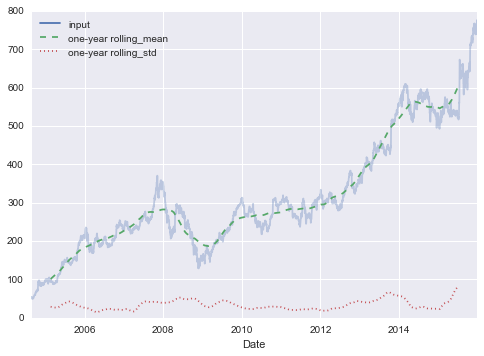

In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD',parse_dates=True,index_col='Date')

In [3]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134126 entries, 2012-10-03 00:00:00 to 2020-06-30 23:00:00
Data columns (total 3 columns):
Fremont Bridge Total            134105 non-null float64
Fremont Bridge East Sidewalk    134105 non-null float64
Fremont Bridge West Sidewalk    134105 non-null float64
dtypes: float64(3)
memory usage: 4.1 MB


In [9]:
data.columns=['Total','East','West']

In [10]:
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


##### Resampling basically means representing the data with a different frequency. Assume we have a temperature sensor which takes measurements every minute. If we do not need to have a minute-level precision, we can take the average of 60 minute measurements in an hour and show the changes in the temperature hourly. This is down-sampling which means converting to a lower frequency.Resampling can be done using resample() or asfreq() functions. Resample: Aggregates data based on specified frequency and aggregation function. Asfreq: Selects data based on the specified frequency and returns the value at the end of the specified interval.

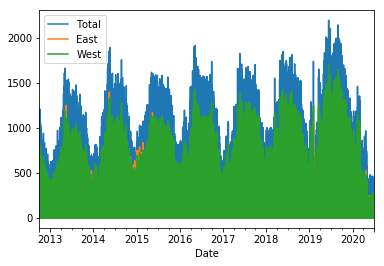

In [13]:
import matplotlib.pyplot as plt
data.resample('3T').sum().plot()

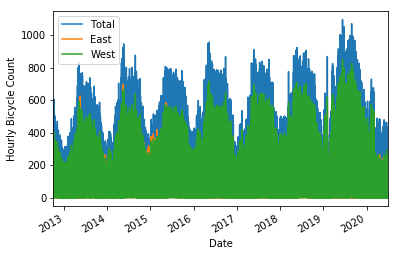

In [14]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

In [24]:
weekly=data.resample('W').sum()
weekly.plot(figsize(12,12))

plt.ylabel('Weekly bicycle count')

NameError: name 'figsize' is not defined

In [25]:
help(weekly.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  Make plots of Series or DataFrame using the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pie' : pie plot
 |      - 'scatter' : scatter plot
 |      - 'hexbin' : hexbin pl

Text(0,0.5,'Mean Hourly Count')

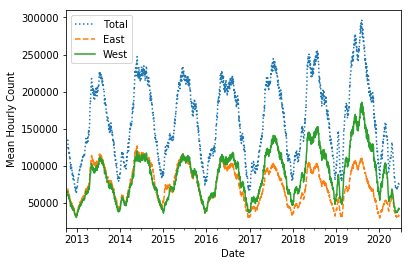

In [27]:
daily=data.resample('D').sum()
daily.rolling(30,center=True).sum().plot(style=[':','--','-'])
plt.ylabel('Mean Hourly Count')

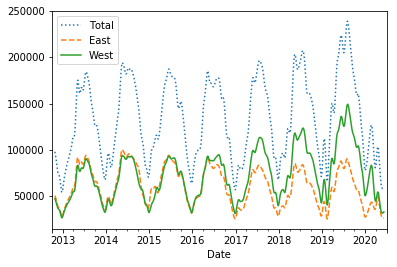

In [33]:
daily.rolling(50, center=True,
win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

### While the smoothed data views in Figure 3-14 are useful to get an idea of the general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average traffic as a function of the time of day. We can do this using the GroupBy functionality

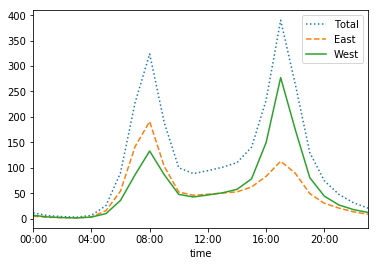

In [34]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);


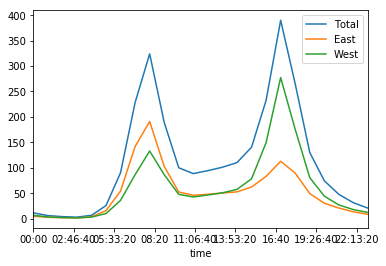

In [36]:
by_time.plot()

In [44]:
by_weekday=data.groupby(data.index.dayofweek).mean()
by_weekday.index=['Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']

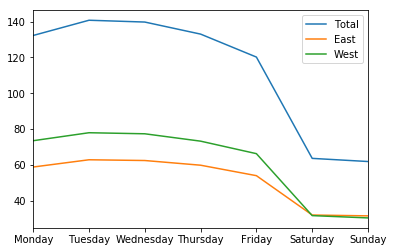

In [45]:
by_weekday.plot()